<img src="logo_card_cropped.png" alt="Drawing" style="width: 180px;" align="center"/><center>RESEARCH

# Predicting Income based on US census dataset

## Context and Objective

This notebook's objective is to predict individual yearly income, based on US government census dataset containing 41 features such as age, degree, etc... <br>
This data was extracted from the census bureau database found at https://www.census.gov/<br>

Income per person is a binary variable, worth either over or under $50,000 per year.<br>
This is a supervised classification problem, so we will use various machine learning algorithms to perform the prediction.<br>


## Approach

This notebook follows a rigourous Data Science methodology. Different dataset will be used for model selection and validation, so we can have a good estimate of our algo's predictive power.

<img src="research_process.png" alt="Drawing" style="width: 1024px;" align="center"/>

## 1. Data Import

First we need to import some libraries. We are using Numpy/Pandas/Scikit-learn

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import time

Let's import the learn data file in a dataframe. 

In [2]:
df = pd.read_csv('./us_census_full/census_income_learn.csv',index_col=False, header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


Now let's load the header and map it to the data file.

In [3]:
mapping = pd.read_csv('./us_census_full/census_income_header.csv',header =None, names = ['feat','type','nb'], index_col=False)
mapping.head(5)

,feat,type,nb
0,age,continuous,91
1,class of worker,nominal,9
2,detailed industry recode,nominal,52
3,detailed occupation recode,nominal,47
4,education,nominal,17


In [4]:
df.columns = mapping['feat'].tolist()
df['income'] = pd.factorize(df['income'])[0]
#df = df.drop(['num persons worked for employer'], axis=1)
#mapping  = mapping [mapping.feat != 'num persons worked for employer']
df.head(5)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


Data looks good. Now we are ready to take a closer look at it.

## 2. Continuous Data analysis 

For each continuous data we want to visualize the histograms and pairwise relationships.<br>

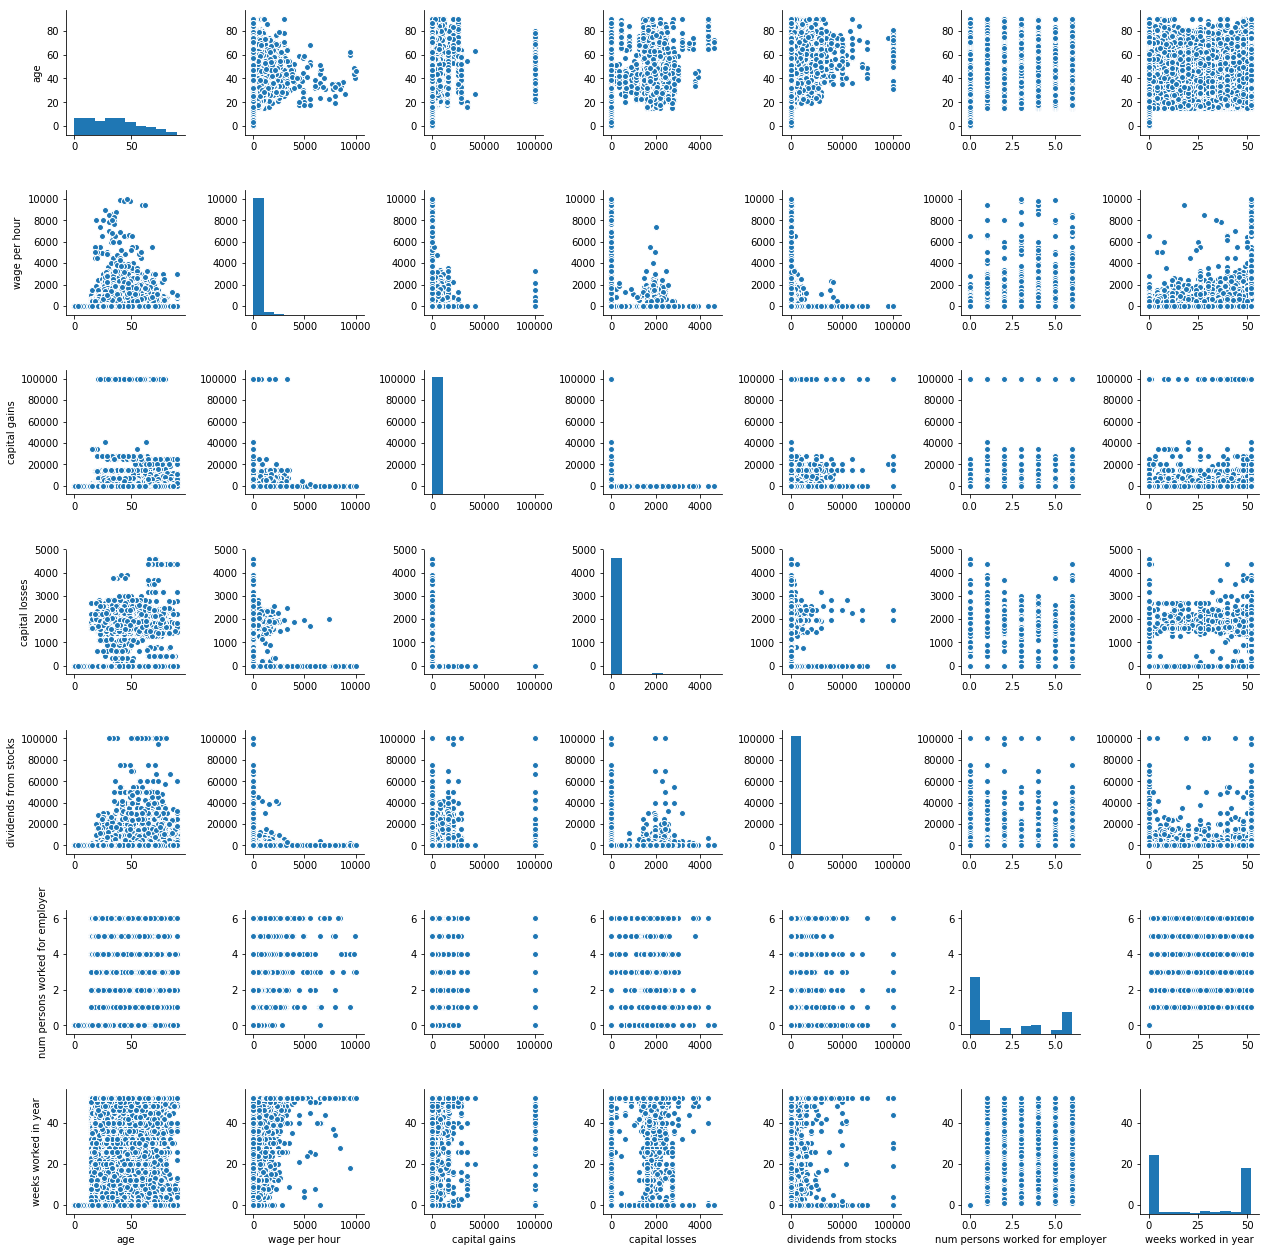

In [5]:
list_continuous_feat = mapping[mapping['type'] == 'continuous']['feat'].tolist()
continuous_df = df[list_continuous_feat[:-1]]
sns.pairplot(continuous_df);

'Age' is well distributed, as expected. 'weeks worked in year' is more binary : when you work, you are very likely to work full time (50 weeks a year).<br>
Capital gains, losses and dividends are mostly at 0, as only a small proportion of people have access to this kind of investment (stocks, bonds, etc...)

Pandas has a nice function called 'describe', that generate basic statistics from the dataframe.

In [6]:
df.describe().round(2)

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,income
count,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.00,199523.0,199523.00
mean,34.49,15.35,11.31,55.43,434.72,37.31,197.53,1740.38,1.96,0.18,1.51,23.17,94.5,0.06
std,22.31,18.07,14.45,274.90,4697.53,271.90,1984.16,993.77,2.37,0.55,0.85,24.41,0.5,0.24
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,37.87,0.00,0.00,0.00,0.00,94.0,0.00
25%,15.00,0.00,0.00,0.00,0.00,0.00,0.00,1061.62,0.00,0.00,2.00,0.00,94.0,0.00
50%,33.00,0.00,0.00,0.00,0.00,0.00,0.00,1618.31,1.00,0.00,2.00,8.00,94.0,0.00
75%,50.00,33.00,26.00,0.00,0.00,0.00,0.00,2188.61,4.00,0.00,2.00,52.00,95.0,0.00
max,90.00,51.00,46.00,9999.00,99999.00,4608.00,99999.00,18656.30,6.00,2.00,2.00,52.00,95.0,1.00


Some features are pretty sparse but we need to keep them as they look like good income predictors.
We can find if some of the variables are redundant by computing the actual correlation matrix:

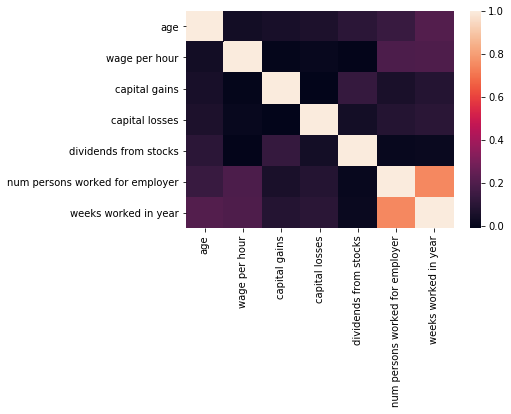

In [7]:
corr = continuous_df.corr()
sns.heatmap(corr)

The only obvious correlation is between 'num persons worked for employer' and 'weeks worked in year'.  Let's perform some PCA analysis to see if we can perform some dimensionality reduction based on principal components.

Text(0.5,1,'Scatterplot of a 6D dataset reduced to 2D using PCA. Class 0 = Income Less than 50k')

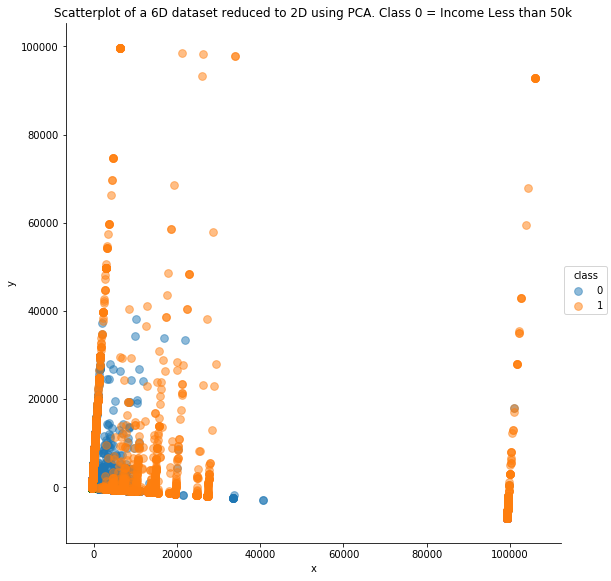

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(continuous_df)
Z = pca.transform(continuous_df)
dfpca = pd.DataFrame(Z, columns=['x','y'], index=continuous_df.index)
dfpca['class'] = df['income']

g = sns.lmplot('x', 'y', dfpca, hue='class', fit_reg=False, size=8
                ,scatter_kws={'alpha':0.5,'s':60})
g.axes.flat[0].set_title('Scatterplot of a 6D dataset reduced to 2D using PCA. Class 0 = Income Less than 50k')

The 2 principal components from PCA does not really help us separating higher income ('Class 1') from lower income ('Class 0'). 

## 3. Categorical Data Analysis

In a first step, let's visualize the distributions of categorical data. In order to simplify, we keep only the top 5 categories and group the other ones in an 'other' category. We display the first 6 categorical features for clarity purpose.

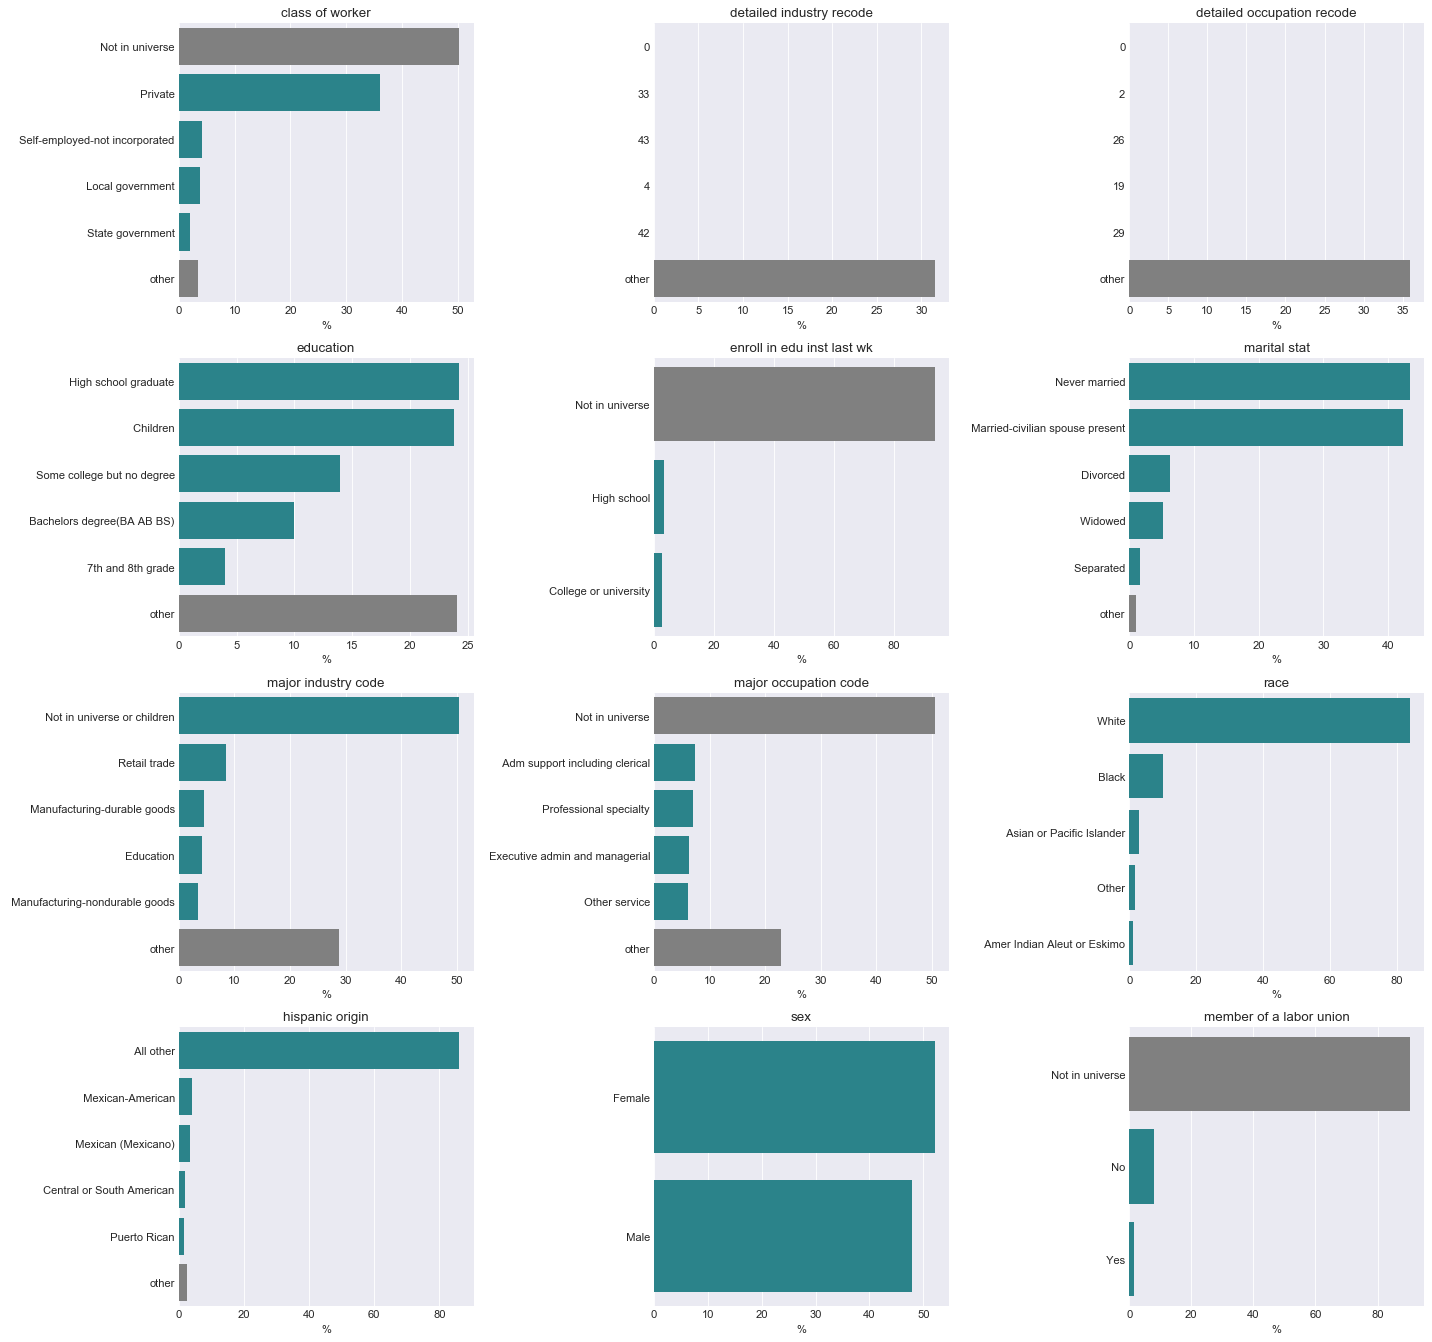

In [9]:
sns.set_style("darkgrid")
list_categorical_feat = mapping[mapping['type'] == 'nominal']['feat'].tolist()

nb_categorical_feat = len(list_categorical_feat)
fig = plt.figure(figsize=(18, 50), dpi= 80, facecolor='w', edgecolor='k')

total_nb = len( df)
for i in range(12):#nb_categorical_feat) :
    feat = list_categorical_feat[i]
    ax1 = fig.add_subplot(int(nb_categorical_feat/3)+1,3,i+1)
    
    #let's build a list of all possible values as well as their count
    values = df[feat].unique()
    values_count = [(value,len(df[feat][df[feat]==value])/total_nb*100) for value in values]
    
    #let's sort by size
    sorted_values = sorted(values_count, key=lambda tup: tup[1], reverse=True)
    
    # we keep the top5 and complete it by the 'other' label
    labels = [sorted_values[i][0] for i in range(min(len(sorted_values),5))]
    sizes = [sorted_values[i][1] for i in range(min(len(sorted_values),5))]
    
    if len(sorted_values) > 5 : 
        labels.append('other')
        sizes.append(np.sum( [sorted_values[i][1] for i in range(5,len(sorted_values))] ))   
    
    colors =  ['grey' if (label in ['other', ' Not in universe', ' ?']) else '#1B919A' for label in labels ]
    
    sns.barplot(x=sizes, y=labels,  ax = ax1, palette=colors)
    ax1.set_xlabel('%')
    ax1.set_title(feat)

plt.tight_layout()

Some features like 'major occupation code' or 'enroll in edu inst last wk' are mostly not in universe. That does not mean that we should remove them now as they could still carry predictive power for some special cases.<br>
In order to use the categories as features in our model, we use One Hot encoding to transform categorical data into booleans. We compute the correlations on resulting one-hot encoded data and display only perfect correlations or anticorrelations.

In [10]:
correls = pd.get_dummies(df[list_categorical_feat].astype(str)).corr()
correlated_pairs = []
for feat1 in correls.columns :
    for feat2 in correls.columns :
        if feat2 == feat1 : break
        if abs(correls[feat1][feat2]) > 0.9999 :
            correlated_pairs.append((feat1,feat2))
for i in range(5):
    feat1,feat2 = correlated_pairs[i]
    print(feat1,'|',feat2,'|', correls[feat1][feat2])

detailed occupation recode_0 | detailed industry recode_0 | 1.0
detailed occupation recode_46 | detailed industry recode_51 | 1.0
major industry code_ Armed Forces | detailed industry recode_51 | 1.0
major industry code_ Armed Forces | detailed occupation recode_46 | 1.0
major industry code_ Communications | detailed industry recode_30 | 1.0


These results will be useful to filter redundant features when using One Hot encoding.
Let's put them in a list for later :

In [11]:
filter_OHE = np.unique([item2 for item1,item2 in correlated_pairs]).tolist()
filter_OHE[:5]

['class of worker_ Never worked',
 'country of birth self_ United-States',
 'detailed industry recode_0',
 'detailed industry recode_29',
 'detailed industry recode_3']

## 4. Predictive Analysis Baseline on continuous data

Before we can perform some work on the features and model, it is good to have a first baseline.<br>
Let's perform a simple Logistic regression. We train our model on 70% of the learning dataset and test it on the remaining 30%. The testing dataset will be used to do final performance assessment instead of model selection. <br> NB: A better performance assessment could be done using a k-fold cross validation. Instead, we shuffle the data and run it 2 times (not represented here) to check that the variation between the runs is low.

In [12]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(shuffle(df[list_continuous_feat]), test_size = 0.3)
print(len(train_df),len(test_df))
train_df.head(5)

139666 59857


,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,weeks worked in year,income
45105,1,0,0,0,0,0,0,0
167917,30,0,0,0,0,6,52,0
127968,5,0,0,0,0,0,0,0
138801,3,0,0,0,0,0,0,0
4366,40,0,0,0,0,6,52,0


### Training

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
train_data = train_df.values
classifier.fit(train_data[:,:-1], train_data[:,-1] )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Testing

In [14]:
test_data = test_df.drop(['income'],axis = 1).values
prediction = classifier.predict(test_data)
conf = pd.crosstab(test_df['income'], prediction, rownames=['Test Data'], colnames=['Predictions->'])
print('Confusion matrix:')
print(conf,'\n')
print('Total Accuracy: %.1f%% ' %((conf[0][0]+conf[1][1])/len(test_data)*100 ) )
#Precision and recall computation
print('High Salary Precision: %.1f%%' %(conf[1][1]/(conf[1][0]+conf[1][1])*100 )  )
print('High Salary Recall: %.1f%%' %(conf[1][1]/(conf[0][1]+conf[1][1])*100 ) )

Confusion matrix:
Predictions->      0    1
Test Data                
0              55947  209
1               3060  641 

Total Accuracy: 94.5% 
High Salary Precision: 75.4%
High Salary Recall: 17.3%


Total Accuracy looks good at 94% but in reality the classifier misses a lot of high salaries (Percentage of correctly predicted high salaries = 17%).
At this stage, it is interesting to see the features importance. To be able to compare, we normalize the coefficent with the standard deviation of the input data:

In [15]:
print(np.stack([test_df.drop(['income'],axis = 1).columns.tolist(),np.std(test_data, 0)*classifier.coef_[0]]).transpose())

[['age' '0.8126243849063497']
 ['wage per hour' '-0.05692643342427428']
 ['capital gains' '0.8180572507776759']
 ['capital losses' '0.214426073509479']
 ['dividends from stocks' '0.4468815965205895']
 ['num persons worked for employer' '0.3309118831000775']
 ['weeks worked in year' '1.5072558544350938']]


The most important feature is the number of weeks worked in year. The more you work the higher your income is! 
The only surprising result is the 'wage per hour'. The higher your wage is and the higher your income would be.

## 5. Model Selection

In order to compare several scenarios, we code a function that allows various parameters in input and returns the model performance. <br>
We use 2 main models : Logistic Regression and Random Forest.
For each model, the function allows to set a regularization parameter (C for Logistic and number of trees for Random Forest)
We can also decide to use only continuous features, to use simple factorization or One Hot encoding for categorial features. <br>
Finally we can add any custom filter to remove some features. By default, previously computed redundant One Hot categories are filtered.

In [18]:
from sklearn.ensemble import RandomForestClassifier


###### Model Selection Function
# Input : model parameters and filters
# output : model testing result and features importance

def model_selection(args):
    
    model,reg,include_nominal_flag,one_hot_flag,filters = args
    
    # Classifier setup
    if model == 'LR' :
        classifier = LogisticRegression(C= reg)
    elif model == 'RF' :
        classifier = RandomForestClassifier(n_estimators=reg, n_jobs = 6)
    
    # Categorical Features processing
    if include_nominal_flag == False :
        #Applying input filter on feature
        new_df  = df.drop(filters, axis=1)
        train_df, test_df = train_test_split(shuffle(new_df[list_continuous_feat]), test_size = 0.3)
        
        
    else :   
        if one_hot_flag :    
            # we use pandas' get_dummies function to generate one hot encoding
            new_df = pd.concat([pd.get_dummies(df[list_categorical_feat].astype(str)),df[list_continuous_feat]], axis=1)
            # filtering OHE categories found during correlation analysis
            new_df = new_df.drop(filter_OHE, axis=1)
        else :
            new_df = df.copy()
            for feat in list_categorical_feat :
                new_df[feat] = pd.factorize(df[feat])[0]

        #Applying input filter on feature
        new_df  = new_df.drop(filters, axis=1)
        train_df, test_df = train_test_split(shuffle(new_df), test_size = 0.3)

    # Training
    train_data = train_df.values
    classifier.fit(train_data[:,:-1], train_data[:,-1] )
    
    # Testing
    test_data = test_df.drop(['income'],axis = 1).values
    prediction = classifier.predict(test_data)
    conf = pd.crosstab(test_df['income'], prediction, rownames=['Test Data'], colnames=['Predictions->']) 
    
    # Features Importance computation
    features_importance = []
    
    if model == 'LR' :       
        features_importance = np.stack([test_df.drop(['income'],axis = 1).columns.tolist(),np.std(test_data, 0)*classifier.coef_[0]]).transpose()
        features_importance = features_importance[np.abs(pd.to_numeric(features_importance[:,1])).argsort()[::-1]]

    elif model == 'RF' :
        sorted_indexes = np.argsort(classifier.feature_importances_)[::-1]
        for index in sorted_indexes :
            features_importance.append([test_df.drop(['income'],axis = 1).columns.tolist()[index],classifier.feature_importances_[index]])
        features_importance = np.array(features_importance)
    
    # End
    return conf,features_importance


Now let's build a dictionnary of arguments and run the function over them!
Ideally the regularization parameters would need more datapoints in order to optimize the model more thoroughly, but here we only keep 3 different parameters (C1,C2,C4 and 1,10,100 trees)

In [19]:
# create dictionnary of arguments
arg_dico = {
    'Linear_C1_NoCat(Baseline)' : ('LR',1,False,False,[]),
    'Linear_C2_NoCat' : ('LR',2,False,False,[]),    
    'Linear_C4_NoCat' : ('LR',4,False,False,[]),      
    'Linear_C1_FactorizedCat(Not recommended)' : ('LR',1,True,False,[]),
    'Linear_C1_OneHotEncoder' : ('LR',1,True,True,[]),    
    'Linear_C2_OneHotEncoder' : ('LR',2,True,True,[]),      
    'Linear_C4_OneHotEncoder' : ('LR',4,True,True,[]),
    'Forest_1tree_NoCat' : ('RF',1,False,False,[]),    
    'Forest_10tree_NoCat' : ('RF',10,False,False,[]),
    'Forest_100tree_NoCat' : ('RF',100,False,False,[]),    
    'Forest_1tree_FactorizedCat' : ('RF',1,True,False,[]),    
    'Forest_10tree_FactorizedCat' : ('RF',10,True,False,[]),
    'Forest_100tree_FactorizedCat' : ('RF',100,True,False,[]),      
    'Forest_1tree_OneHotEncoder' : ('RF',1,True,True,[]),    
    'Forest_10tree_OneHotEncoder' : ('RF',10,True,True,[]),
    'Forest_100tree_OneHotEncoder' : ('RF',100,True,True,[])
}

#initialize output
output = {}
stats_list = ['Precision','Recall','total_accuracy']

for stat in stats_list :
    output[stat] = {}

feat_output = {}

#run model_selection function over the arguments
for arg in arg_dico :
    print('start...',arg)
    conf,feat_importance = model_selection(arg_dico[arg])
    output['total_accuracy'][arg] = (conf[0][0]+conf[1][1])/len(test_data)*100 
    output['Precision'][arg] = (conf[1][1]/(conf[1][0]+conf[1][1])*100 )  
    output['Recall'][arg] = (conf[1][1]/(conf[0][1]+conf[1][1])*100 ) 
    feat_output[arg] = feat_importance.tolist()



start... Linear_C1_NoCat(Baseline)
start... Linear_C2_NoCat
start... Linear_C4_NoCat
start... Linear_C1_FactorizedCat(Not recommended)
start... Linear_C1_OneHotEncoder
start... Linear_C2_OneHotEncoder
start... Linear_C4_OneHotEncoder
start... Forest_1tree_NoCat
start... Forest_10tree_NoCat
start... Forest_100tree_NoCat
start... Forest_1tree_FactorizedCat
start... Forest_10tree_FactorizedCat
start... Forest_100tree_FactorizedCat
start... Forest_1tree_OneHotEncoder
start... Forest_10tree_OneHotEncoder
start... Forest_100tree_OneHotEncoder


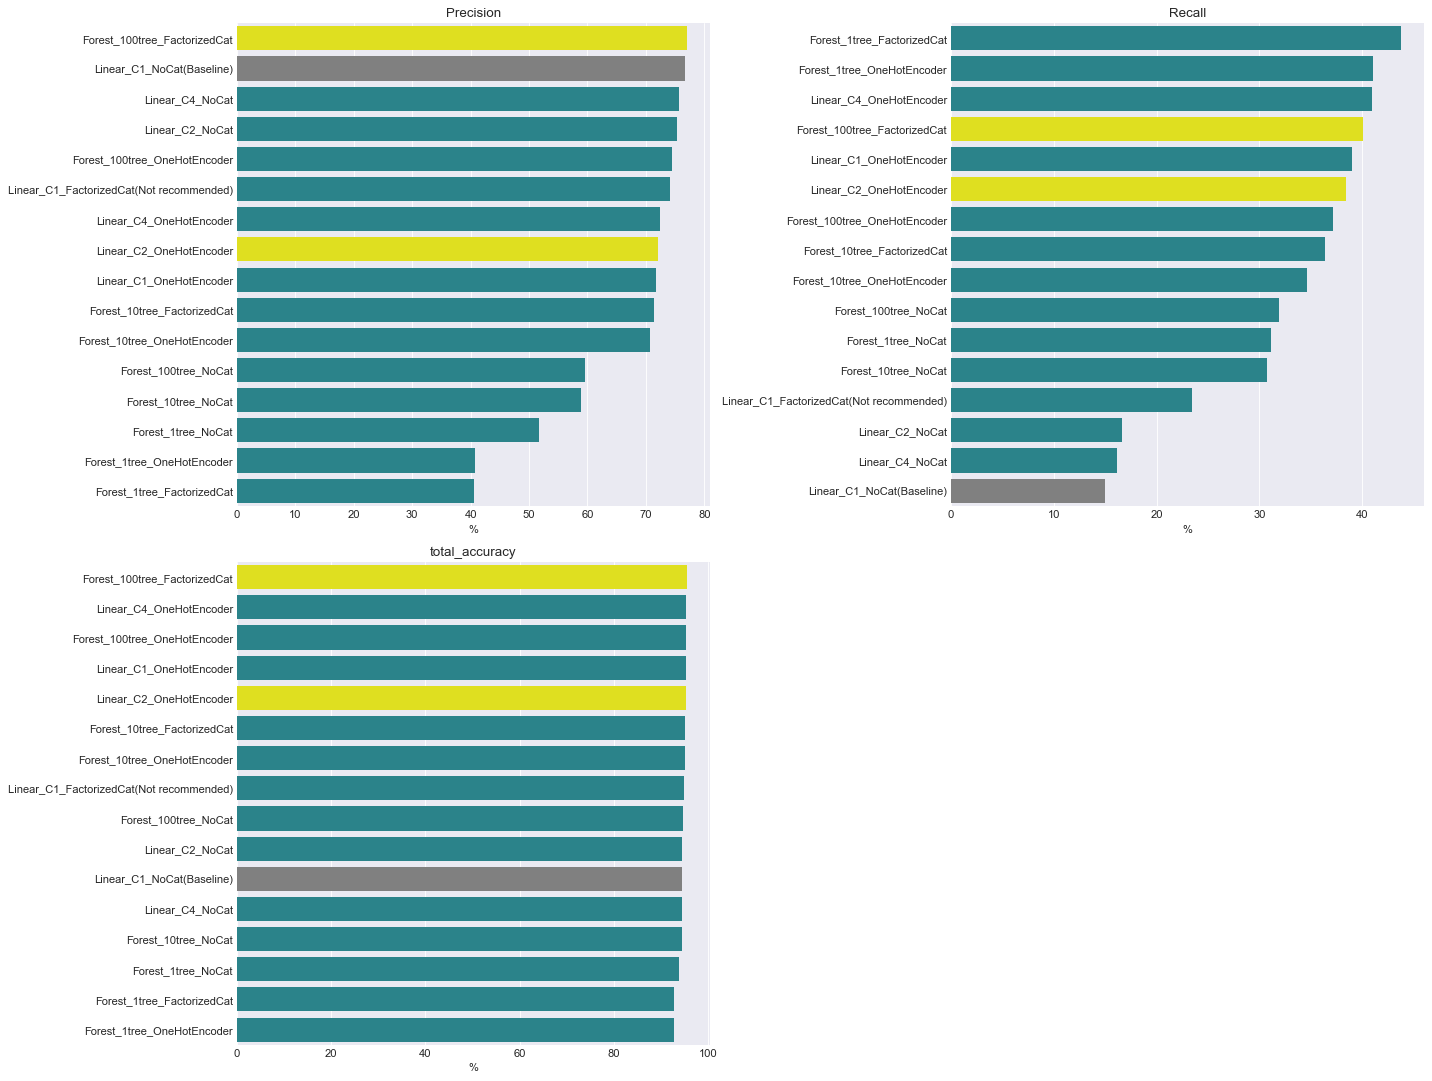

In [20]:
fig = plt.figure(figsize=(18, 20), dpi= 80, facecolor='w', edgecolor='k')
total_nb = len( df)
for i in range(3) :

    stat = stats_list[i]
    ax1 = fig.add_subplot(3,2,i+1)
    
    labels = []
    sizes = []
    
    for arg in output[stat] :
        labels.append(arg)
        sizes.append(output[stat][arg])
        
    indices = np.argsort(sizes)
    labels = np.array(labels)[indices][::-1]
    sizes = np.array(sizes)[indices][::-1]
    
    colors =[]
    for label in labels:
        if ('Baseline' in label) :
            colors.append('grey')
        elif label in ['Linear_C2_OneHotEncoder','Forest_100tree_FactorizedCat']:
            colors.append('yellow')
        else:
            colors.append('#1B919A')
    
    sns.barplot(x=sizes, y=labels,  ax = ax1, palette=colors)
    ax1.set_xlabel('%')
    ax1.set_title(stat)
    
plt.tight_layout()


## Model Selection results

All models perform in a similar way for total_accuracy.
<br>
Here we can see that Linear_C2_OneHotEncoder and Forest_100tree_FactorizedCat (both displayed in yellow) are superior to the other ones on precision and recall.<br>
Unsurprisingly, Logistic Regression needs One Hot encoding on categorical variables, whereas Random Forest is performing well on simple factorization.<br>
Let's see how our 2 models are performing vs. the other ones:

Text(0.5,1,'Models performance. Class 0 = Linear, Class 1 = RandomForest')

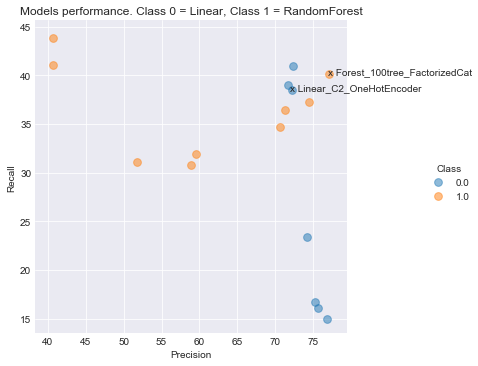

In [21]:
Recall = [output['Recall'][run] for run in output['Recall'].keys() ]
Precision = [output['Precision'][run] for run in output['Recall'].keys() ]
Class = [0 if 'Linear' in run else 1 for run in output['Recall'].keys() ]

df_model = pd.DataFrame(np.transpose([Recall,Precision,Class]), columns=['Recall','Precision','Class'])
g = sns.lmplot('Precision','Recall', df_model, hue='Class', fit_reg=False, scatter_kws={'alpha':0.5,'s':60})

plt.text(output['Precision']['Linear_C2_OneHotEncoder']-0.2, output['Recall']['Linear_C2_OneHotEncoder'], 'x Linear_C2_OneHotEncoder')
plt.text(output['Precision']['Forest_100tree_FactorizedCat']-0.2, output['Recall']['Forest_100tree_FactorizedCat'], 'x Forest_100tree_FactorizedCat')
g.axes.flat[0].set_title('Models performance. Class 0 = Linear, Class 1 = RandomForest')


# 6. Features Analysis and selection

In this chapter we analyse the features and select the most important one. The features weights were computed by the model selection function and put in 'feat_output'. <br> 
Let's start by the linear model:

In [22]:
feat_output['Linear_C2_OneHotEncoder'][:10]

[['weeks worked in year', '0.9272007725901268'],
 ['age', '0.7317095778420316'],
 ['tax filer stat_ Nonfiler', '-0.7193987352822804'],
 ['sex_ Male', '0.5430317691060688'],
 ['capital gains', '0.4700543214271189'],
 ['full or part time employment stat_ Children or Armed Forces',
  '-0.43538439162503584'],
 ['num persons worked for employer', '0.374420024911329'],
 ['dividends from stocks', '0.37342700411381285'],
 ['live in this house 1 year ago_ Not in universe under 1 year old',
  '-0.3614169849307166'],
 ['year_95', '-0.3508644364953103']]

Let's put together a list of less important features :

In [23]:
linear_filter =[]
for feat,weight in feat_output['Linear_C2_OneHotEncoder'] :
    if abs(float(weight)) < 0.03 : linear_filter.append(feat)
linear_filter[:5]

['detailed industry recode_38',
 'detailed industry recode_25',
 'detailed occupation recode_25',
 'detailed occupation recode_36',
 'detailed industry recode_27']

Now let's analyze the Random Forest features importance.

In [24]:
feat_output['Forest_100tree_FactorizedCat'][:10]

[['dividends from stocks', '0.0930563776144'],
 ['instance weight', '0.0908621891972'],
 ['age', '0.0891965093514'],
 ['capital gains', '0.0860570647788'],
 ['education', '0.0604784924665'],
 ['detailed occupation recode', '0.0594030745526'],
 ['major occupation code', '0.0566264915647'],
 ['detailed industry recode', '0.0491536031909'],
 ['major industry code', '0.0434931339939'],
 ['num persons worked for employer', '0.0381327309943']]

Same thing, let's build a filter with non important features for Random Forest.

In [25]:
forest_filter =[]
for feat,weight in feat_output['Forest_100tree_FactorizedCat'] :
    if abs(float(weight)) < 0.02 : forest_filter.append(feat)
forest_filter[:5]

['detailed household and family stat',
 'marital stat',
 'country of birth father',
 'own business or self employed',
 'tax filer stat']

As RandomForest is an ensemble of single decision trees, it is also interesting to visualize one decision tree. 

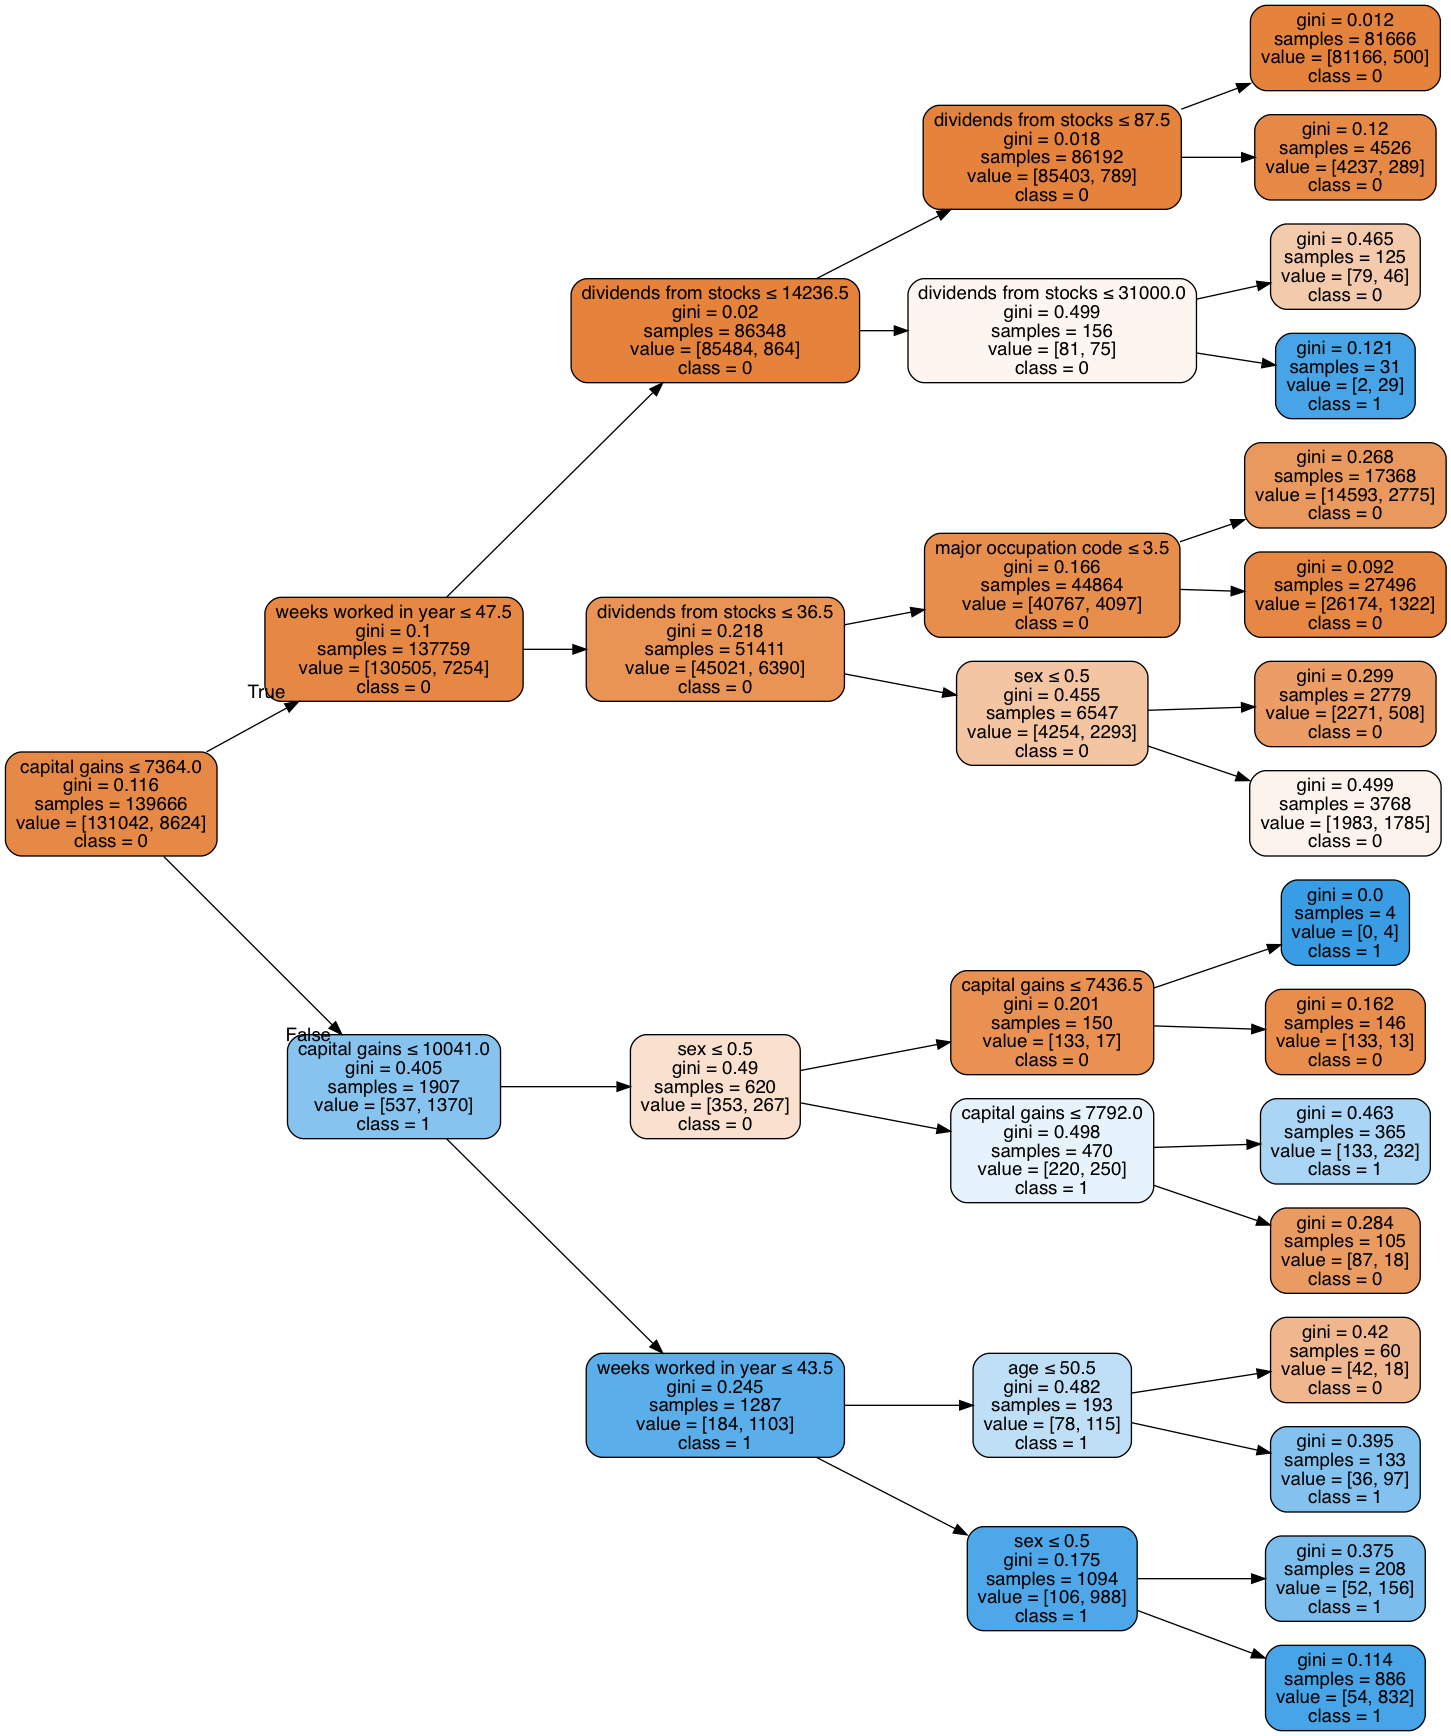

In [26]:
from sklearn import tree
dtree =  tree.DecisionTreeClassifier(max_depth = 4)

# Categorical Features processing
new_df = df.copy()
for feat in list_categorical_feat :
    new_df[feat] = pd.factorize(df[feat])[0]

#Applying input filter on feature
new_df  = new_df.drop(forest_filter, axis=1)
train_df, test_df = train_test_split(shuffle(new_df), test_size = 0.3)

# Training
train_data = train_df.values
dtree.fit(train_data[:,:-1], train_data[:,-1] )

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, rotate = True, feature_names  =train_df.columns[:-1], class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

We can explicitely see how the algo determines the income (Orange for Low Income and Blue for High Income), based on thresholds on the features <br>
Now let's rerun the algos and assess performance with and without the filters. 

In [27]:
arg_dico = {
    'Linear_C2_OneHotEncoder' : ('LR',2,True,True,[]), 
    'Forest_100tree_FactorizedCat' : ('RF',100,True,False,[]) ,   
    'Linear_C2_OneHotEncoder_FILTER' : ('LR',2,True,True,linear_filter), 
    'Forest_100tree_FactorizedCat_FILTER' : ('RF',100,True,False,forest_filter)        
}

output = {}
stats_list = ['Precision','Recall','total_accuracy']

for stat in stats_list :
    output[stat] = {}

feat_output = {}

#run the model selection algo over the arguments
for arg in arg_dico :
    start_time = time.time()
    conf,feat_importance = model_selection(arg_dico[arg])
    output['total_accuracy'][arg] = (conf[0][0]+conf[1][1])/len(test_data)*100 
    output['Precision'][arg] = (conf[1][1]/(conf[1][0]+conf[1][1])*100 )  
    output['Recall'][arg] = (conf[1][1]/(conf[0][1]+conf[1][1])*100 ) 
    feat_output[arg] = feat_importance.tolist()
    print('Processing time for '+arg+':', int(time.time()-start_time),'secs.' )


Processing time for Linear_C2_OneHotEncoder: 12 secs.
Processing time for Forest_100tree_FactorizedCat: 10 secs.
Processing time for Linear_C2_OneHotEncoder_FILTER: 9 secs.
Processing time for Forest_100tree_FactorizedCat_FILTER: 6 secs.


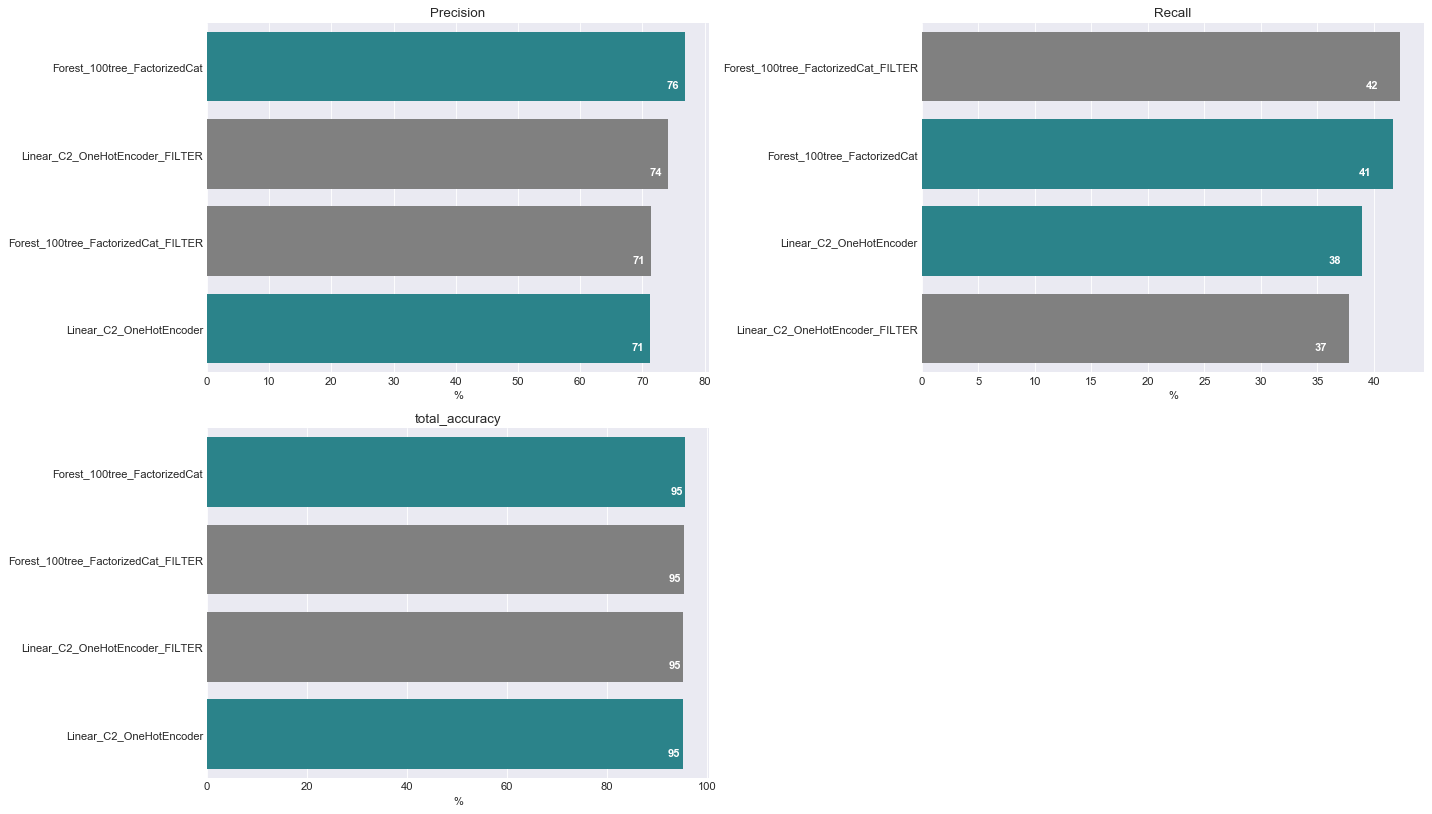

In [28]:
plt.gcf().clear()

fig = plt.figure(figsize=(18, 15), dpi= 80, facecolor='w', edgecolor='k')
total_nb = len( df)
for i in range(3) :

    stat = stats_list[i]
    ax1 = fig.add_subplot(3,2,i+1)
    
    labels = []
    sizes = []
    
    for arg in sorted(output[stat]) :
        labels.append(arg)
        sizes.append(output[stat][arg])
    
    indices = np.argsort(sizes)
    labels = np.array(labels)[indices][::-1]
    sizes = np.array(sizes)[indices][::-1]
    colors =  ['grey' if 'FILTER' in label else '#1B919A' for label in labels ]
 
    sns.barplot(x=sizes, y=labels,  ax = ax1, palette=colors)
    ax1.set_xlabel('%')
    ax1.set_title(stat)
    
    for i, v in enumerate(sizes):
        ax1.text(v -3 , i + .25, str(int(v)), color='white', fontweight='bold')
    
plt.tight_layout()
plt.show()

## Feature Selection results

Results show that filtering does not improve overall accuracy on linear and decreases accuracy on Random Forest. We can however observe speed gains of 40%!<br>
We will use the filtered version going forward.

# 7. Results validation on the testing set

Here we train the algo on the full training set and test it on the separate testing set. We use both algos Linear_C2_OneHotEncoder_FILTER and Forest_100tree_FactorizedCat_FILTER to save processing time on the larger dataset.

In [30]:
# we apply to the validation data the same header and preprocessing as for the training data
valid_df = pd.read_csv('./us_census_full/census_income_test.csv',index_col=False, header=None)
valid_df.columns = mapping['feat'].tolist()
valid_df['income'] = pd.factorize(valid_df['income'])[0]

# we concatenate both files in order to re use the previous function
len_training = len(df)
print(len(df))
df = pd.concat([df,valid_df[1:]])
print(len(df),len(valid_df))

###### Model Validation Function
# Input : model parameters and filters
# output : model validation performance

def model_validation(args):
    
    model,reg,include_nominal_flag,one_hot_flag,filters = args
    

    # Classifier setup
    if model == 'LR' :
        classifier = LogisticRegression(C= reg)
    elif model == 'RF' :
        classifier = RandomForestClassifier(n_estimators=reg, n_jobs = 6)
    
    # Categorical Features processing
    if include_nominal_flag == False :
        #Applying input filter on feature
        new_df  = df.drop(filters, axis=1)
        train_df = new_df[list_continuous_feat][:len_training]
        test_df = new_df[list_continuous_feat][len_training:]        
        
        
    else :   
        if one_hot_flag :    
            # we use pandas' get_dummies function to generate one hot encoding
            new_df = pd.concat([pd.get_dummies(df[list_categorical_feat].astype(str)),df[list_continuous_feat]], axis=1)
            # filtering OHE categories found during correlation analysis
            new_df = new_df.drop(filter_OHE, axis=1)
        else :
            new_df = df.copy()
            for feat in list_categorical_feat :
                new_df[feat] = pd.factorize(df[feat])[0]

        #Applying input filter on feature
        new_df  = new_df.drop(filters, axis=1)
        train_df = new_df[:len_training]
        test_df = new_df[len_training:]        

    # Training
    train_data = train_df.dropna().values
    classifier.fit(train_data[:,:-1], train_data[:,-1] )
    
    # Testing
    test_data = test_df.drop(['income'],axis = 1).dropna().values
    prediction = classifier.predict(test_data)
    conf = pd.crosstab(test_df['income'], prediction, rownames=['Test Data'], colnames=['Predictions->']) 
    
    # Features Importance computation
    features_importance = []
    
    if model == 'LR' :       
        features_importance = np.stack([test_df.drop(['income'],axis = 1).columns.tolist(),np.std(test_data, 0)*classifier.coef_[0]]).transpose()
        features_importance = features_importance[np.abs(pd.to_numeric(features_importance[:,1])).argsort()[::-1]]

    elif model == 'RF' :
        sorted_indexes = np.argsort(classifier.feature_importances_)[::-1]
        for index in sorted_indexes :
            features_importance.append([test_df.drop(['income'],axis = 1).columns.tolist()[index],classifier.feature_importances_[index]])
        features_importance = np.array(features_importance)
    
    # End
    return conf,features_importance


199523
299284 99762


In [31]:
arg_dico = {
    'Linear_C2_OneHotEncoder_FILTER_VALID' : ('LR',2,True,True,linear_filter), 
    'Forest_100tree_FactorizedCat_FILTER_VALID' : ('RF',100,True,False,forest_filter)        
}

output = {}
stats_list = ['Precision','Recall','total_accuracy']

for stat in stats_list :
    output[stat] = {}

feat_output = {}

#run the final model validation function over the 2 arguments
for arg in arg_dico :
    start_time = time.time()
    conf,feat_importance = model_validation(arg_dico[arg])
    output['total_accuracy'][arg] = (conf[0][0]+conf[1][1])/len(valid_df)*100 
    output['Precision'][arg] = (conf[1][1]/(conf[1][0]+conf[1][1])*100 )  
    output['Recall'][arg] = (conf[1][1]/(conf[0][1]+conf[1][1])*100 ) 
    
    feat_output[arg] = feat_importance.tolist()
    print('Processing time for '+arg+':', int(time.time()-start_time),'secs.' )

Processing time for Linear_C2_OneHotEncoder_FILTER_VALID: 14 secs.
Processing time for Forest_100tree_FactorizedCat_FILTER_VALID: 9 secs.


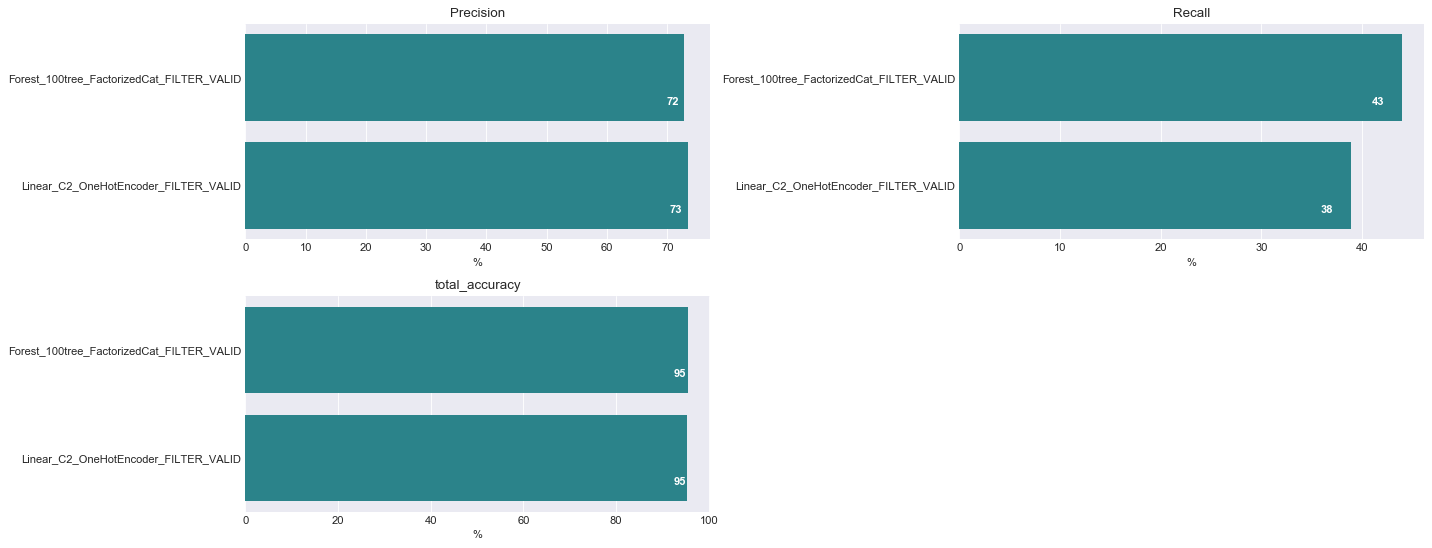

In [34]:
fig = plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
total_nb = len( df)
for i in range(3) :

    stat = stats_list[i]
    ax1 = fig.add_subplot(3,2,i+1)
    
    labels = []
    sizes = []
    
    for arg in sorted(output[stat]) :
        labels.append(arg)
        sizes.append(output[stat][arg])
    
    colors =  ['#1B919A' for label in labels ]
 
    sns.barplot(x=sizes, y=labels,  ax = ax1, palette=colors)
    ax1.set_xlabel('%')
    ax1.set_title(stat)

    
    for i, v in enumerate(sizes):
        ax1.text(v -3 , i + .25, str(int(v)), color='white', fontweight='bold')
    
plt.tight_layout()

## Validation results

The results roughly correspond to the figures computed during the model selection phase.
It means that the computed accuracy is good indicator of the algos' real predictive power.

## High Income profiling

The most simple way to profile high income individuals is to analyze the list of features weights within the linear model. <br>
Features weights on Random forest does not show wether the impact is positive or negative, so we would have to select and display an individual tree.

In [35]:
feat_output['Linear_C2_OneHotEncoder_FILTER_VALID'][:40]

[['weeks worked in year', '0.9132074816375575'],
 ['tax filer stat_ Nonfiler', '-0.7901395659139808'],
 ['age', '0.7285789371347816'],
 ['sex_ Male', '0.5456841035624778'],
 ['full or part time employment stat_ Children or Armed Forces',
  '-0.5395734433385442'],
 ['capital gains', '0.45308389668229854'],
 ['family members under 18_ Not in universe', '-0.43138696221024786'],
 ['live in this house 1 year ago_ Not in universe under 1 year old',
  '-0.42114776333931103'],
 ['num persons worked for employer', '0.41700233210634874'],
 ['year_95', '-0.41018246806199976'],
 ['detailed household summary in household_ Child under 18 never married',
  '-0.3581554980566332'],
 ['detailed household and family stat_ Child <18 never marr not in subfamily',
  '-0.3557378510664057'],
 ['dividends from stocks', '0.3303877735926017'],
 ['education_ Children', '-0.30528350372131907'],
 ['veterans benefits_0', '-0.3049498994329003'],
 ['live in this house 1 year ago_ No', '-0.23701646896854855'],
 ['educa

As previously observed, most predictors of individual income are not surprising :
- number of weeks worked in a year is the most positively correlated with income
- persons which do not file tax tend to have a low income
- as mentioned in numerous studies, men earn more than women in average
- capital gains, dividends from stocks, degree levels (Masters, then Bachelors) are a good indicator of high income

Some other indicators give good insights (ie we learn something from the data):
- income seems to be higher in 1995 than in 1994 
- being 'Never married' leads to lower income (-0.15)
- capital losses is positively correlated to income. If you lose money by playing with the stock market and hence decrease your income, it means that you are probably still in the higher income category

And some others are more difficult to understand:
- Impact on income is higher if your mother is from Mexico (+0.11) rather than if your father is from Mexico (-0.088). It could be interesting to dig deeper into this.


# Next Steps

Some additional work could be done to increase accuracy and performance.
- ensembling linear and random forest models
- Neural network embedding (e.g. word2vec) to reduce the number of categorical features
- cluster analysis to create group of similar persons and generate statistical features

Thanks for reading!!